This model predicts whether a customer will make a transaction in the future.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
data = pd.read_csv('../input/train.csv')
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [4]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

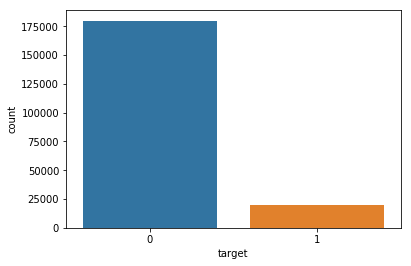

In [5]:
#checking target column
sns.countplot(data['target'])

In [6]:
#checking for null values
data.columns[data.isnull().any()]

Index([], dtype='object')

In [7]:
#checking count for possible values of target
data.groupby('target').count()['ID_code']

target
0    179902
1     20098
Name: ID_code, dtype: int64

In [8]:
y = data['target']
X = data.drop(['target', 'ID_code'], axis=1)

#scaling dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,0.460091,1.076623,-0.054077,-1.714773,0.561098,-0.009778,-1.401636,-0.229802,-1.395940,2.285292,-0.468989,-0.126734,-0.606166,-1.039947,1.005683,-0.823003,-0.184673,0.479492,-0.768964,0.360340,0.926437,1.162587,-1.299824,0.489773,-0.447275,1.300500,-0.484245,0.897088,-1.396490,0.789254,...,-0.808962,-1.468275,-1.230618,-1.133356,1.749415,-1.323871,-0.711244,0.442890,1.500647,-0.400904,-1.075697,-1.411980,0.122226,0.642079,-0.231051,-1.347890,-0.974846,0.700359,-0.291946,-0.311275,-1.076447,-0.779321,0.261797,1.251424,1.404031,2.086632,0.900016,-0.810464,0.556997,-0.164257,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,-0.144987,1.893408,-0.000409,-0.025160,-0.935586,-2.120000,1.757336,-1.473077,-0.948119,2.017368,-1.678317,-1.771135,1.491237,0.668183,-0.954799,0.782756,-1.302434,-0.932390,-0.621140,-1.722433,-0.202250,-1.165592,0.695096,1.063517,-0.118257,-0.599010,0.196242,-0.011334,0.040634,0.741083,...,0.480256,1.078324,-1.086283,0.918394,-0.392137,-0.832228,0.640994,1.727411,-0.339675,0.443627,1.252712,1.102749,0.255461,1.037661,1.408807,-0.395487,-0.590320,1.783707,-0.738204,3.031050,-0.542085,-0.435700,-1.743656,0.146464,1.050349,-0.186013,-0.412563,-0.483543,-0.522151,-1.129387,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,-0.130752,-1.343197,0.888789,-0.262491,-0.005875,0.179918,-0.647163,0.589523,-1.342815,1.005285,0.759841,0.107340,-1.085317,0.937877,-1.299019,-1.575276,-0.665103,-1.158352,0.399967,0.416687,-0.428711,0.968919,-0.685601,0.987446,-0.718871,0.051395,0.804550,0.473703,0.058326,0.058332,...,-1.015814,0.967742,-0.460899,-1.004946,0.335468,0.237541,0.853879,-0.185182,0.766417,0.359986,-1.601890,-0.572671,-1.448003,-0.862364,0.766677,-0.249092,0.331276,-1.156053,-1.012477,-0.067934,-0.294957,-0.506407,-1.560110,-1.254681,1.108568,-0.278666,-1.127290,0.351547,-1.314146,-1.626240,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,0.347543,1.014331,-0.934857,0.741492,-0.480762,0.641408,0.551235,0.784619,0.088977,0.160959,1.192958,-0.573410,0.883010,-0.562999,0.410618,0.242366,0.822099,0.152265,0.477453,-0.846035,-0.948135,0.022063,-0.796119,-1.988413,-1.523135,-1.884007,1.918310,-1.340964,-0.343157,0.000871,...,0.700720,1.537629,1.300009,-1.351618,-1.505430,-0.411123,-1.015017,0.185862,-1.407938,-0.793123,-1.615767,-0.996695,-0.182207,2.076768,-0.765424,-1.223761,1.953266,0.788267,-1.102129,1.109222,-0.192528,-1.220110,0.131590,-0.337210,-1.418782,0.832451,-0.325002,-0.215372,-0.751604,1.129547,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,-1.788863,-1.490109,-0.925386,-0.138103,0.112013,1.171149,-0.330867,0.391612,-1.110346,-0.140479,1.384169,0.207760,2.038227,-0.579511,0.959326,-0.434959,1.220617,-1.446727,0.470432,1.101452,0.568668,-0.428840,0.194985,1.052620,1.7936

In [9]:
#splitting dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)
X_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
86698,0.460351,0.019758,2.429754,-0.794704,0.223126,-0.295715,-0.623870,-0.457408,1.475485,1.005179,-0.367446,1.171996,-0.401338,-0.983599,0.419633,-0.702255,0.311031,0.798444,1.113769,0.714451,-1.326511,0.330214,0.516747,-1.078475,-0.607481,-0.306078,-1.374789,0.327495,-0.811856,1.999601,-1.425650,-1.715298,0.501304,0.825265,-1.357519,-2.613800,0.078293,-0.483081,1.182168,-0.903024,...,-0.560521,1.606456,0.931949,1.358775,-0.087342,0.201734,-0.575181,-0.062791,0.455179,0.474485,1.262317,-1.148797,-1.306998,0.396582,-1.489612,0.202336,-1.454848,-0.328479,1.934472,1.429342,-0.026711,1.995381,-1.723642,-0.207197,-0.741284,-0.693594,0.106662,0.667927,-2.002253,-0.477773,-1.182378,0.360832,-0.598503,1.288953,-1.895021,-0.040725,-0.470548,-0.789756,0.105841,0.199410
176411,-1.070253,-1.564278,-0.582945,-0.600607,0.227994,-0.542484,-1.249645,-1.099349,-0.068583,-0.109335,-0.745302,0.695332,0.858272,-0.093465,0.014055,-0.003949,0.921687,0.206765,-1.581589,-0.631171,1.378723,-0.116096,0.489218,1.499662,-0.446199,-0.077385,0.361088,1.242761,0.980156,0.835887,1.905587,0.114707,-1.270417,-0.599227,-0.062683,-1.158557,-0.457514,0.769650,-0.113939,-0.735089,...,-1.352737,2.000146,-0.423635,-0.518595,0.238743,1.209124,-0.752901,-2.008213,0.283091,-1.688542,0.526343,1.133169,-0.139794,0.201028,0.260190,-0.742010,0.430053,0.809151,-0.615754,1.788870,-0.861820,-0.954922,0.214884,0.524058,-1.198054,-0.727413,0.358061,0.401613,-0.376483,0.863863,0.278549,0.345286,0.664332,0.666236,-0.330090,-1.174862,-1.303368,1.661788,0.596950,1.095349
12536,-1.047424,1.282562,-0.517096,-0.092168,1.168451,-1.013650,-0.569866,-1.039520,0.604130,-0.587852,-0.213141,1.344133,-0.462372,-0.301266,-1.324749,0.049729,2.178151,0.720814,0.291566,0.002355,-1.083260,0.285415,-1.013020,0.566644,0.968565,0.763844,2.460343,-1.306083,0.146063,0.996480,-1.630254,-0.045811,-1.761332,1.156013,0.862517,0.244829,0.770350,-0.022136,0.160665,-0.514977,...,-1.342489,2.330516,0.678640,0.321782,2.168890,0.947808,-0.888152,0.769794,0.651929,-0.636127,-0.014699,-1.917671,0.743866,0.642414,1.318496,0.575137,-0.248873,-1.890204,1.268465,-0.232460,-1.690600,-0.093682,-0.694759,-0.604076,-0.338462,0.939135,0.002830,0.177244,0.194348,0.512348,0.224886,-0.734738,0.509505,0.810423,1.216054,0.248073,-0.492585,-1.455430,-0.210805,-0.572137
115696,1.645663,1.593671,1.416572,1.002964,-1.728639,-0.166825,-0.602753,-0.129444,0.541086,-0.946942,0.169078,-1.017682,-1.434176,0.763067,-0.805598,-1.218395,1.180073,0.257595,0.204868,-0.668186,0.728086,0.151554,1.184560,0.105259,-0.592470,0.413974,0.704575,-2.052682,0.523154,0.295239,-0.788213,0.787891,-0.586019,1.038646,0.785894,1.159175,-1.113193,0.239319,-0.255120,0.748161,...,1.062128,1.037486,-0.679903,0.956345,-0.181703,0.359691,-0.771565,-2.212022,1.496526,-0.519463,-0.440432,0.093692,-0.459387,2.125941,0.617485,-1.728574,-0.354784,1.611049,-1.414550,0.683026,1.686196,0.594508,-1.749413,0.524304,1.230061,-1.383772,0.328717,0.623192,-0.493682,-0.312668,-2.106739,-1.307331,1.335996,0.773224,1.105501,-0.815893,0.854833,0.954449,1.283215,0.056049
134161,-0.918117,0.773233,0.144008,-1.882936,-0.274672,0.985282,-0.382468,-1.518885,1.449769,1.216180,-0.768335,-1.735091,-1.111118,-0.664666,0.587122,-1.095250,0.089401,-0.215084,0.856488,1.888739,0.093973,-1.511013,0.277838,-0.104841,-0.278881,-1.071659,-1.198807,-1.399145,1.380480,0.246461,0.541286,-0.010438,1.474902,-0.31796

In [10]:
X_train.shape, X_test.shape

((140000, 200), (60000, 200))

In [11]:
#using random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictionRFC = rfc.predict_proba(X_test)
predictionRFC

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ]])

In [12]:
#probability that a customer will make this transaction (target class 1)
prob = [1 - item[0] for item in predictionRFC] 
prob[:5]

[0.0, 0.09999999999999998, 0.0, 0.0, 0.4]

In [13]:
#evaluating performance of the model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prob)

0.7033182499589671

In [14]:
#loading test dataset
test = pd.read_csv('../input/test.csv')
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [15]:
#making prediction on test dataset
test_ID = test['ID_code']
test_sc = test.drop(['ID_code'], axis=1)
test_scaled = sc.transform(test_sc)
#test_scaled = pd.DataFrame(test_scaled, columns = test_sc.columns)
predicted = pd.DataFrame([1 - item[0] for item in rfc.predict_proba(test_scaled)])
predicted.rename(columns={0: 'target'}, inplace=True)
predicted_output = pd.concat([test_ID, predicted['target']], axis=1)
predicted_output.head()

,ID_code,target
0,test_0,0.3
1,test_1,0.1
2,test_2,0.1
3,test_3,0.1
4,test_4,0.1


In [16]:
#resampling imbalanced dataset using SMOTE/ADASYN
#sm = SMOTE(random_state=12, ratio = 1.0)
#X_train_res, y_train_res = sm.fit_sample(X_train_scaled, y_train)
#type(X_train_res), type(y_train_res)

In [17]:
predicted_output.to_csv('PredictedRFC', index=False)